In [1]:
%pylab inline --no-import-all
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import math

import seaborn as sns
from windrose import WindroseAxes

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv("data-4.csv",index_col= ['datetime_local'])
df

,wt,avg_metwndspd_ms,n_metwndspd_ms,avg_wtgp_kw,n_wtgp_kw,avg_genspd_rpm,n_genspd_rpm,avg_metextmp_degc,n_metextmp_degc,avg_nacelle_degc,...,avg_gen_bear_de_degc,n_gen_bear_de_degc,avg_gen_bear_nde_degc,n_gen_bear_nde_degc,avg_gen_l1_degc,n_gen_l1_degc,avg_gen_l2_degc,n_gen_l2_degc,avg_mbearing_nde_degc,n_mbearing_nde_degc
datetime_local,,,,,,,,,,,,,,,,,,,,,
2021-01-30 00:00:00,1,1.26426,25,-0.501060,2,0.000000,0,5.000000,1,10.00000,...,18.290091,0,17.000000,0,23.638161,0,23.129120,0,17.000000,0
2021-01-30 00:00:00,2,1.11586,28,-0.024740,3,0.000000,0,5.510000,0,9.56373,...,19.680691,0,17.190371,0,23.569330,0,24.000000,2,18.000000,1
2021-01-30 00:00:00,3,0.74355,39,-1.190170,5,0.000000,0,4.404410,0,10.48037,...,25.390631,0,22.216909,0,35.548611,0,35.000000,1,17.000000,2
2021-01-30 00:00:00,4,1.30097,30,-0.043300,2,88.024834,40,-167.830917,0,12.50000,...,27.108589,0,23.000000,1,33.813641,0,33.787739,0,17.524549,0
2021-01-30 00:00:00,5,1.04183,19,-0.024740,2,65.412003,40,7.000000,0,11.52273,...,25.130560,0,20.277439,0,28.000000,1,28.000000,0,18.222969,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-12 23:50:00,45,4.43053,40,-6.966870,8,553.946167,40,-5.181030,0,7.45818,...,16.000000,1,17.526791,0,13.000000,1,13.432690,0,22.537230,0
2021-02-12 23:50:00,46,4.20590,37,-6.933710,9,484.384155,40,-6.000000,0,2.43910,...,9.000000,1,6.640240,0,8.000000,1,8.242650,0,16.908730,0
2021-02-12 23:50:00,47,4.51918,38,-6.767370,4,515.194031,40,-6.218910,0,4.50000,...,12.164060,0,10.593750,0,9.000000,2,11.352520,0,20.736610,0


In [3]:
df.describe()

,wt,avg_metwndspd_ms,n_metwndspd_ms,avg_wtgp_kw,n_wtgp_kw,avg_genspd_rpm,n_genspd_rpm,avg_metextmp_degc,n_metextmp_degc,avg_nacelle_degc,...,avg_gen_bear_de_degc,n_gen_bear_de_degc,avg_gen_bear_nde_degc,n_gen_bear_nde_degc,avg_gen_l1_degc,n_gen_l1_degc,avg_gen_l2_degc,n_gen_l2_degc,avg_mbearing_nde_degc,n_mbearing_nde_degc
count,98784.000000,98733.000000,98784.000000,97700.000000,98784.000000,98733.000000,98784.000000,98733.000000,98784.000000,98733.000000,...,97949.000000,98784.000000,97949.000000,98784.000000,97949.000000,98784.000000,97949.000000,98784.000000,97949.000000,98784.000000
mean,25.000000,7.309609,37.536160,663.143435,23.601140,1109.248094,31.061933,-31.636043,0.544329,14.945080,...,34.576854,0.566286,37.564285,0.620424,57.537205,1.430647,57.180668,1.415766,27.298870,0.275368
std,14.142207,5.069202,4.735712,864.550943,17.605587,786.338777,13.568095,89.436491,0.957822,5.683084,...,14.958779,0.827180,19.132712,0.844040,38.675430,1.589228,38.013978,1.576348,9.930208,0.611858
min,1.000000,-42.440552,0.000000,-116.354301,0.000000,0.000000,0.000000,-273.000000,0.000000,-7.000000,...,-6.000000,0.000000,-7.000000,0.000000,-5.000000,0.000000,-5.000000,0.000000,-6.000000,0.000000
25%,13.000000,3.638670,37.000000,-1.676380,3.000000,316.349823,27.000000,-3.767860,0.000000,11.000000,...,22.323530,0.000000,22.000000,0.000000,25.000000,0.000000,25.000000,0.000000,20.000000,0.000000
50%,25.000000,5.286630,39.000000,134.445854,39.000000,1801.351562,39.000000,6.500000,0.000000,16.000000,...,36.000000,0.000000,37.000000,0.000000,50.333328,1.000000,50.403011,1.000000,29.000000,0.000000
75%,37.000000,10.294910,40.000000,1371.372131,40.000000,1828.269653,40.000000,10.132980,1.000000,19.269739,...,47.000000,1.000000,50.500000,1.000000,81.800003,2.000000,81.000000,2.000000,35.332100,0.000000
max,49.000000,27.578730,41.000000,2266.379395,41.000000,5223.316406,41.000000,60.000000,10.000000,29.000000,...,78.000000,8.000000,83.890846,7.000000,149.000000,10.000000,148.000000,10.000000,47.000000,6.000000


In [4]:
#création de la liste des colonnes avec valeurs manquantes ainsi que leur fréquence
df_manquant = df.isna().sum().where(lambda x: x>0).dropna()

#Séparation des noms de colonnes des fréquences
col_nan = df_manquant.index
freq_nan = df_manquant.values

#creation d'un tableau de présentation des résultats
result_nan = pd.DataFrame({"Série":col_nan, "Nombre de valeurs manquantes": freq_nan})
result_nan

,Série,Nombre de valeurs manquantes
0,avg_metwndspd_ms,51.0
1,avg_wtgp_kw,1084.0
2,avg_genspd_rpm,51.0
3,avg_metextmp_degc,51.0
4,avg_nacelle_degc,51.0
5,max_nacelle_degc,51.0
6,avg_rotpitchanga_deg,51.0
7,avg_rotspd_rpm,51.0
8,avg_wtgcapf_perc,51.0
9,avg_wtgcos_phi,51.0


In [5]:
col_nan = [];
freq_nan = [];
perc_nan = [];
for k in range(1,50):
    df_wtgp = df[df['wt']==k][['avg_wtgp_kw']]
    df_manquant = df_wtgp.isna().sum().where(lambda x: x>0).dropna()
    if len(df_manquant.values) !=0:
        col_nan.append(k)
        freq_nan.append(df_manquant.values[0])
        perc_nan.append(df_manquant.values[0]/len(df_wtgp)*100)
    
#creation d'un tableau de présentation des résultats
result_nan = pd.DataFrame({"wt":col_nan, "Nombre de valeurs manquantes": freq_nan, "percent manquantes %": np.round(perc_nan, decimals=2)})
result_nan

,wt,Nombre de valeurs manquantes,percent manquantes %
0,1,3,0.15
1,2,3,0.15
2,3,3,0.15
3,4,3,0.15
4,5,3,0.15
5,6,196,9.72
6,7,3,0.15
7,8,3,0.15
8,9,190,9.42
9,12,206,10.22


## FILTRAGE RALENTI/ARRÊT/DÉMARRAGE

Tout modèle ou analyse statistique que vous souhaitez créer doit tenir compte des données de fonctionnement en conditions normales. Dans notre cas, il n'est pas correct d'inclure des échantillons se référant à des conditions de fonctionnement éloignées de la plage de fonctionnement normale d'une éolienne. Un moyen simple de filtrer les échantillons de données inutiles est proposé, basé sur trois caractéristiques principales :

1. Puissance de sortie (kW). Elle doit être supérieure à 0 kW et inférieure à la puissance nominale maximale (dans cet exemple 2050kW). 
2. Vitesse du vent (m/s). Dans ce notebook, nous allons évaluer les performances des turbines. Par conséquent, nous devons exclure tous les points qui n'apportent pas de puissance réelle. Pour cette raison, une vitesse de vent trop faible (limite de coupure = 2 m/s) et une vitesse de vent trop élevée (limite de coupure = 25 m/s) doivent être exclues.
3. Angle d'inclinaison (°). L'angle de tangage est un indicateur de la position des aubes de turbine par rapport à la direction du vent. En fonctionnement normal, cet angle est très faible et légèrement négatif (de -5° à - 0°). Les valeurs éloignées de ces limites font référence à des conditions particulières qui doivent être exclues de l'analyse future.

## Capacity Factor

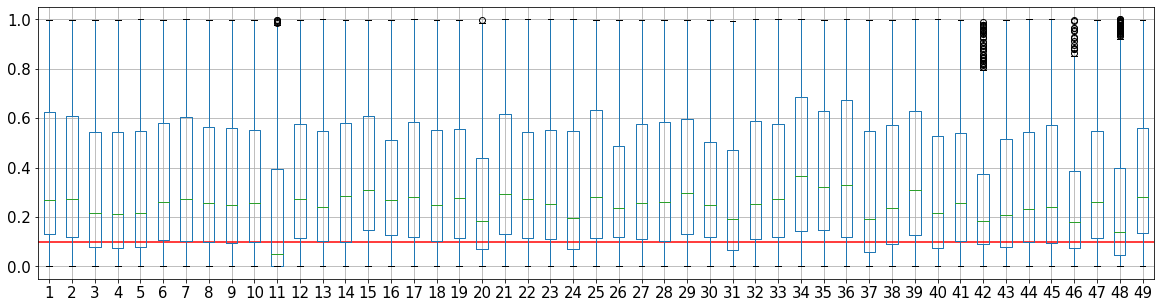

In [6]:
P_nom = 2050 # kW | nominal power

df_wtgp = pd.DataFrame()
for k in range(1,50):
    A = df[df['wt']==k][['avg_wtgp_kw']]
    A[A['avg_wtgp_kw']<0] = np.NaN
    A[A['avg_wtgp_kw']>P_nom] = np.NaN
    df_wtgp[str(k)] = A

df_Cf = df_wtgp/P_nom

plt.figure(figsize=(20, 5))
plt.rcParams['font.size'] = '15'

plt.axhline(y=0.1, color='r', linestyle='-')
df_Cf.boxplot()

plt.show()


## Wind Speed  Distribution & Power Output Distribution

In [7]:
df_wndspd = pd.DataFrame()
for k in range(1,50):
    A = df[df['wt']==k][['avg_metwndspd_ms']]
    A[A['avg_metwndspd_ms']<2] = np.NaN
    A[A['avg_metwndspd_ms']>25] = np.NaN
    df_wndspd[str(k)] = A


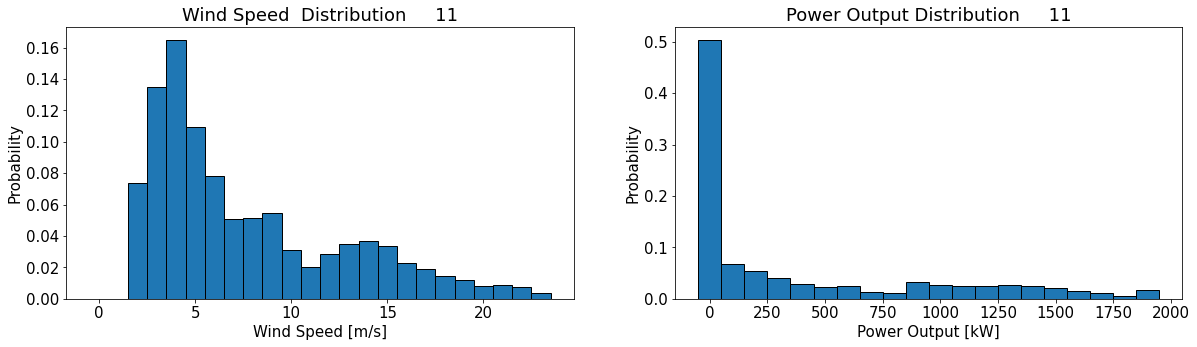

In [8]:
k = 11

f = plt.figure(figsize=(20,5))
plt.rcParams['font.size'] = '15'

ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

X = df_wndspd[str(k)]
Y, bins = np.histogram(X, bins=np.arange(0, X.max())) # Genero el histograma
Y_normed = Y / np.sum(Y)
ax1.bar(bins[:-1], Y_normed, width=1, ec='k')
ax1.set_title('Wind Speed  Distribution     '+str(k))
ax1.set_xlabel('Wind Speed [m/s]')
ax1.set_ylabel('Probability')


X = df_wtgp[str(k)]
Y, bins = np.histogram(X, bins=np.arange(0, X.max(),100)) # Genero el histograma
Y_normed = Y / np.sum(Y)
ax2.bar(bins[:-1], Y_normed, width=100, ec='k')
ax2.set_title('Power Output Distribution     '+str(k))
ax2.set_xlabel('Power Output [kW]')
ax2.set_ylabel('Probability')

plt.show()

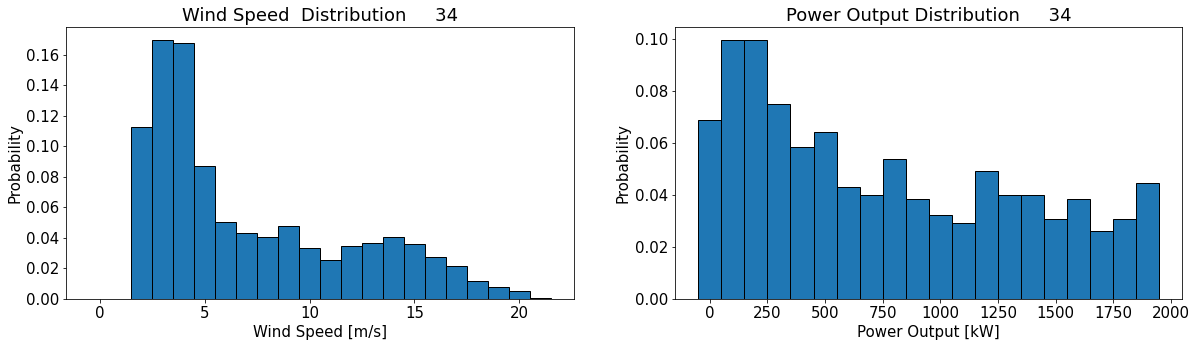

In [9]:
k = 34

f = plt.figure(figsize=(20,5))
plt.rcParams['font.size'] = '15'

ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

X = df_wndspd[str(k)]
Y, bins = np.histogram(X, bins=np.arange(0, X.max())) # Genero el histograma
Y_normed = Y / np.sum(Y)
ax1.bar(bins[:-1], Y_normed, width=1, ec='k')
ax1.set_title('Wind Speed  Distribution     '+str(k))
ax1.set_xlabel('Wind Speed [m/s]')
ax1.set_ylabel('Probability')


X = df_wtgp[str(k)]
Y, bins = np.histogram(X, bins=np.arange(0, X.max(),100)) # Genero el histograma
Y_normed = Y / np.sum(Y)
ax2.bar(bins[:-1], Y_normed, width=100, ec='k')
ax2.set_title('Power Output Distribution     '+str(k))
ax2.set_xlabel('Power Output [kW]')
ax2.set_ylabel('Probability')

plt.show()

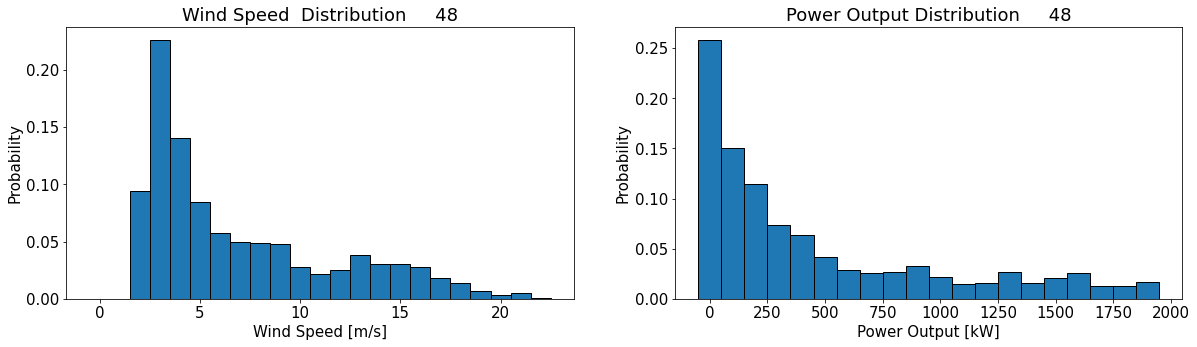

In [10]:
k = 48

f = plt.figure(figsize=(20,5))
plt.rcParams['font.size'] = '15'

ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

X = df_wndspd[str(k)]
Y, bins = np.histogram(X, bins=np.arange(0, X.max())) # Genero el histograma
Y_normed = Y / np.sum(Y)
ax1.bar(bins[:-1], Y_normed, width=1, ec='k')
ax1.set_title('Wind Speed  Distribution     '+str(k))
ax1.set_xlabel('Wind Speed [m/s]')
ax1.set_ylabel('Probability')


X = df_wtgp[str(k)]
Y, bins = np.histogram(X, bins=np.arange(0, X.max(),100)) # Genero el histograma
Y_normed = Y / np.sum(Y)
ax2.bar(bins[:-1], Y_normed, width=100, ec='k')
ax2.set_title('Power Output Distribution     '+str(k))
ax2.set_xlabel('Power Output [kW]')
ax2.set_ylabel('Probability')

plt.show()

# Pitch Angle

In [11]:
df_rotpitch_Before = pd.DataFrame()
df_rotpitch = pd.DataFrame()
for k in range(1,50):
    df_rotpitch_Before[str(k)] = df[df['wt']==k][['avg_rotpitchanga_deg']]
    A = df[df['wt']==k][['avg_rotpitchanga_deg']]
    A[A['avg_rotpitchanga_deg']>5] = np.NaN
    A[A['avg_rotpitchanga_deg']<-5] = np.NaN
    df_rotpitch[str(k)] = A


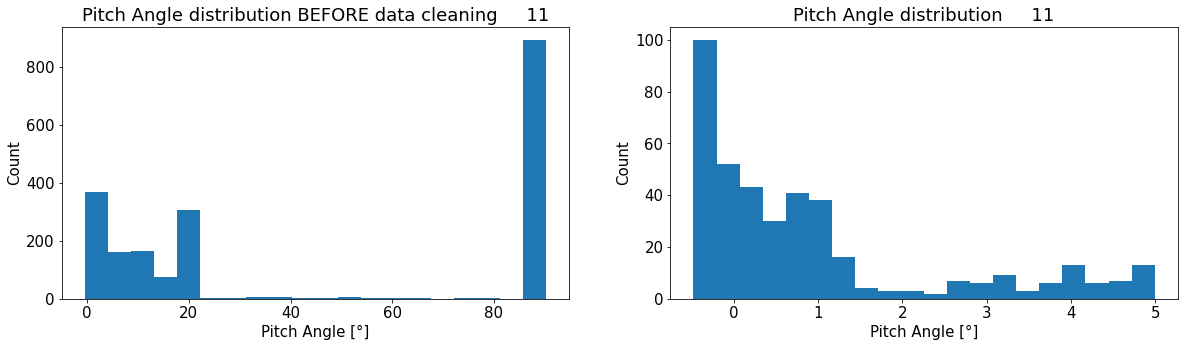

In [12]:
k = 11

f = plt.figure(figsize=(20,5))
plt.rcParams['font.size'] = '15'

ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

X = df_rotpitch_Before[str(k)]
Y, bins = np.histogram(X, bins=np.arange(-5, X.max())) # Genero el histograma
Y_normed = Y / np.sum(Y)
#ax1.bar(bins[:-1], Y_normed, width=1, ec='k')
ax1.hist(X,bins = 20)
ax1.set_title('Pitch Angle distribution BEFORE data cleaning     '+str(k))
ax1.set_xlabel('Pitch Angle [°]')
ax1.set_ylabel('Count')


X = df_rotpitch[str(k)]
Y, bins = np.histogram(X, bins=np.arange(-5, 5)) # Genero el histograma
Y_normed = Y / np.sum(Y)
#ax2.bar(bins[:-1], Y_normed, width=1, ec='k')
ax2.hist(X,bins = 20)
ax2.set_title('Pitch Angle distribution     '+str(k))
ax2.set_xlabel('Pitch Angle [°]')
ax2.set_ylabel('Count')

plt.show()

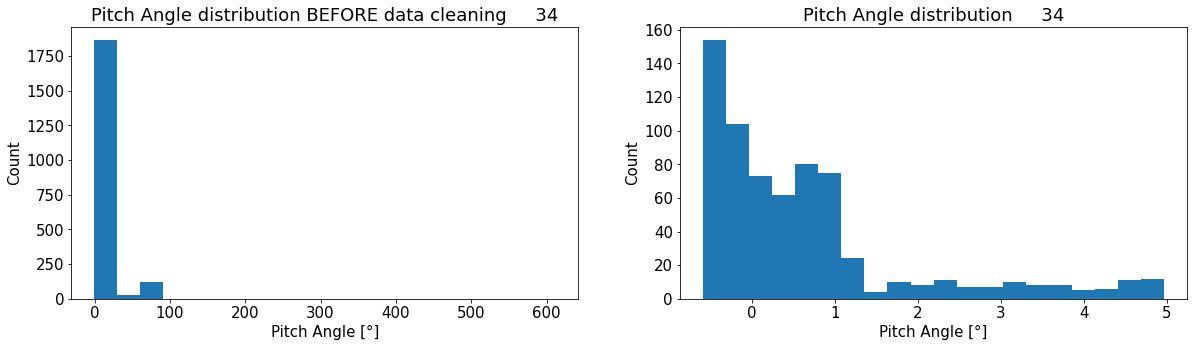

In [13]:
k = 34

f = plt.figure(figsize=(20,5))
plt.rcParams['font.size'] = '15'

ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

X = df_rotpitch_Before[str(k)]
Y, bins = np.histogram(X, bins=np.arange(-5, X.max())) # Genero el histograma
Y_normed = Y / np.sum(Y)
#ax1.bar(bins[:-1], Y_normed, width=1, ec='k')
ax1.hist(X,bins = 20)
ax1.set_title('Pitch Angle distribution BEFORE data cleaning     '+str(k))
ax1.set_xlabel('Pitch Angle [°]')
ax1.set_ylabel('Count')


X = df_rotpitch[str(k)]
Y, bins = np.histogram(X, bins=np.arange(-5, 5)) # Genero el histograma
Y_normed = Y / np.sum(Y)
#ax2.bar(bins[:-1], Y_normed, width=1, ec='k')
ax2.hist(X,bins = 20)
ax2.set_title('Pitch Angle distribution     '+str(k))
ax2.set_xlabel('Pitch Angle [°]')
ax2.set_ylabel('Count')

plt.show()

## Turbine Power Curve (Wind Speed & Power Output)
The power production of a wind turbine is associated with one of the two nonzero regions of the power curve: the nonrated region for wind speeds between the cut-in speed $v_C$ and the rated speed $v_R$ or the rated region for wind speeds between the rated speed and the furling (or cut-out) speed $v_F$.

![figure-1](WindSpeed_Power.png)

**Reference 1** Diyoke, C. A new approximate capacity factor method for matching wind turbines to a site: case study of Humber region, UK. Int J Energy Environ Eng 10, 451–462 (2019). https://doi.org/10.1007/s40095-019-00320-5

**Reference 2** Y. Ditkovich, A. Kuperman, "Comparison of Three Methods for Wind Turbine Capacity Factor Estimation", The Scientific World Journal, vol. 2014, Article ID 805238, 7 pages, 2014. https://doi.org/10.1155/2014/805238

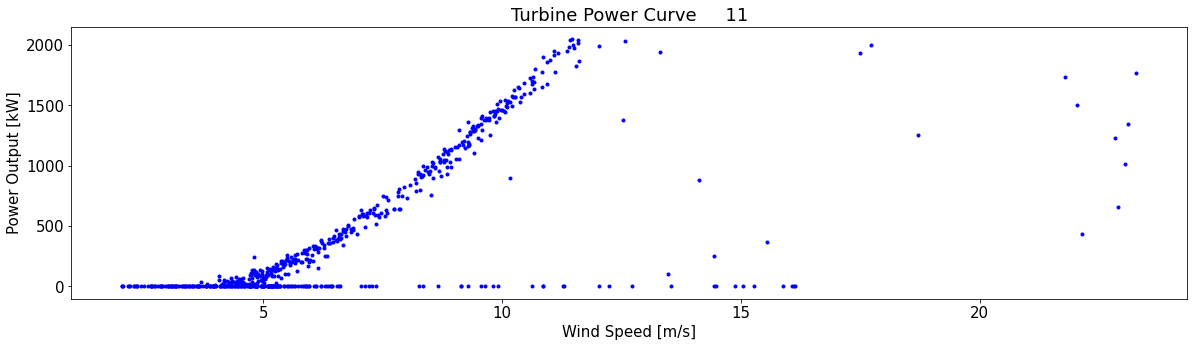

In [14]:
k = 11

X = df_wndspd[str(k)]
Y = df_wtgp[str(k)]

plt.figure(figsize=(20, 5))
plt.rcParams['font.size'] = '15'

plt.plot(X,Y,'b.')
plt.title('Turbine Power Curve     '+str(k))
plt.xlabel('Wind Speed [m/s]')
plt.ylabel('Power Output [kW]')

plt.show()

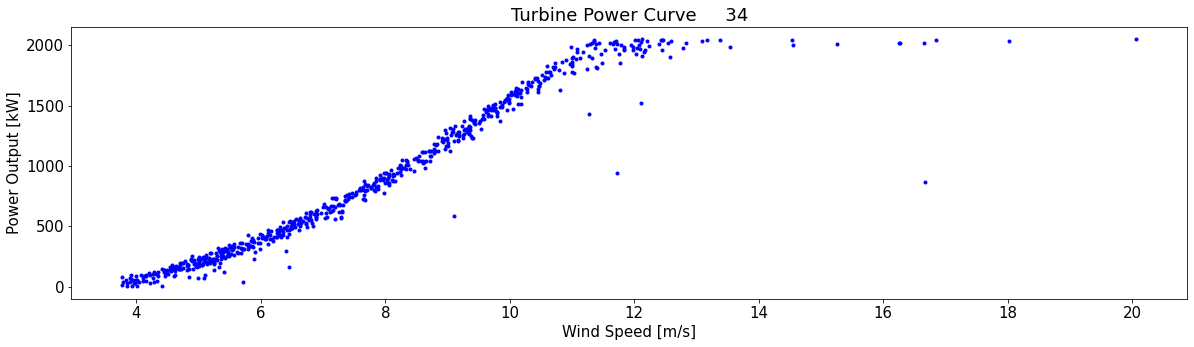

In [15]:
k = 34

X = df_wndspd[str(k)]
Y = df_wtgp[str(k)]

plt.figure(figsize=(20, 5))
plt.rcParams['font.size'] = '15'

plt.plot(X,Y,'b.')
plt.title('Turbine Power Curve     '+str(k))
plt.xlabel('Wind Speed [m/s]')
plt.ylabel('Power Output [kW]')

plt.show()

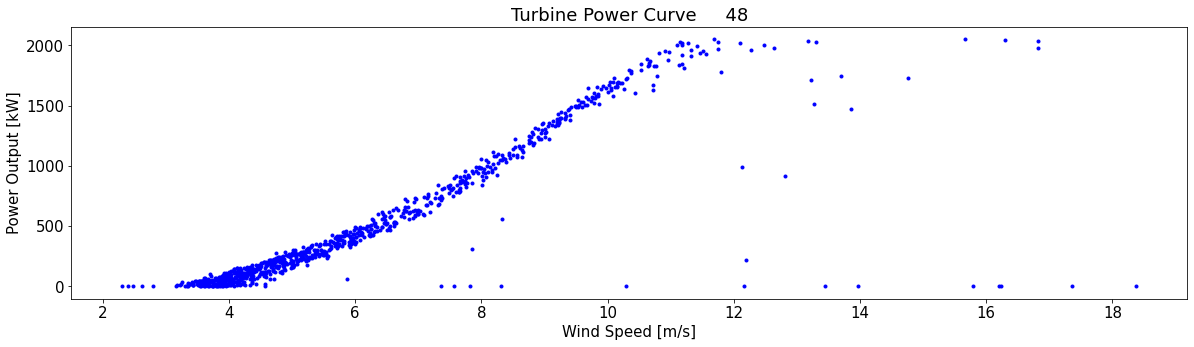

In [16]:
k = 48

X = df_wndspd[str(k)]
Y = df_wtgp[str(k)]

plt.figure(figsize=(20, 5))
plt.rcParams['font.size'] = '15'

plt.plot(X,Y,'b.')
plt.title('Turbine Power Curve     '+str(k))
plt.xlabel('Wind Speed [m/s]')
plt.ylabel('Power Output [kW]')

plt.show()

## Looking for the direction of the wind

In [17]:
Phi = df[['avg_rotpitchana_deg','avg_rotpitchanb_deg','avg_rotpitchanc_deg']]
Phi.describe()

,avg_rotpitchana_deg,avg_rotpitchanb_deg,avg_rotpitchanc_deg
count,97949.000000,97949.000000,97949.000000
mean,17.536151,17.534130,17.576526
std,45.328242,45.534552,45.571607
min,-1.328820,-1.249410,-1.230000
25%,0.875000,0.855000,0.893080
50%,10.640000,10.666670,10.663590
75%,19.920000,19.850000,19.905001
max,1111.000000,1111.000000,1111.000000


In [18]:
Phi = df[['avg_wtgcos_phi']]
Phi.describe()

,avg_wtgcos_phi
count,98733.000000
mean,0.144571
std,0.916124
min,-1.000000
25%,-0.988130
50%,0.885290
75%,0.997100
max,1.000000


In [19]:
df_phi = pd.DataFrame()
for k in range(1,50):
    A = df[df['wt']==k][['avg_wtgcos_phi']]
    df_phi[str(k)] = np.rad2deg(np.arccos(A))
    

In [20]:
df_phi

,1,2,3,4,5,6,7,8,9,10,...,40,41,42,43,44,45,46,47,48,49
datetime_local,,,,,,,,,,,,,,,,,,,,,
2021-01-30 00:00:00,180.000000,120.000000,90.000000,180.000000,120.000000,90.000000,180.000000,180.000000,90.000000,180.000000,...,118.900498,119.957667,172.096045,180.000000,180.000000,120.000000,112.024313,120.000000,90.000000,120.000000
2021-01-30 00:10:00,174.964172,130.555173,124.746040,116.387516,124.195610,90.000000,180.000000,180.000000,90.000000,180.000000,...,120.000000,133.726759,158.813662,180.000000,180.000000,180.000000,120.000000,120.000000,90.000000,123.537317
2021-01-30 00:20:00,180.000000,120.180781,180.000000,124.850006,117.035984,90.000000,180.000000,180.000000,90.000000,180.000000,...,120.000000,120.573949,162.554012,180.000000,180.000000,180.000000,120.000000,118.181098,90.000000,120.000000
2021-01-30 00:30:00,172.163008,118.698465,180.000000,120.000000,124.850006,90.000000,180.000000,180.000000,90.000000,180.000000,...,124.954796,129.479345,167.543481,180.000000,180.000000,180.000000,113.578179,120.000000,90.000000,118.685401
2021-01-30 00:40:00,180.000000,123.552441,180.000000,120.000000,120.000000,90.000000,180.000000,180.000000,90.000000,180.000000,...,120.000000,119.345182,180.000000,180.000000,180.000000,180.000000,121.965600,120.000000,90.000000,117.553716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-12 23:10:00,162.794510,180.000000,180.000000,180.000000,155.425324,172.367348,180.000000,180.000000,180.000000,180.000000,...,180.000000,180.000000,154.745282,148.421118,150.488867,180.000000,118.296211,120.000000,90.000000,180.000000
2021-02-12 23:20:00,145.001793,155.373018,163.042236,106.813658,71.341913,171.336483,157.757488,164.480622,98.213376,180.000000,...,180.000000,180.000000,180.000000,154.314929,147.427407,160.584026,123.055419,180.000000,142.431974,180.000000
2021-02-12 23:30:00,160.288012,170.247946,168.039311,52.593210,85.058418,175.157136,180.000000,170.487643,99.630872,160.122205,...,180.000000,180.000000,180.000000,180.000000,142.082835,158.797811,176.561737,176.190080,164.665855,165.615403


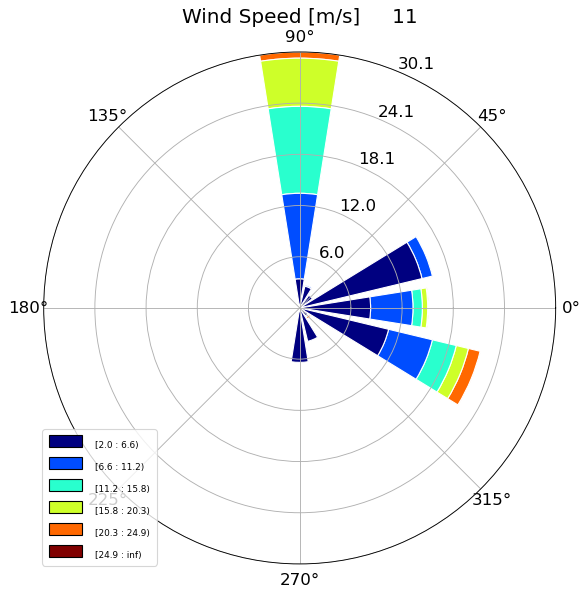

In [21]:
k = 11
ax1 = WindroseAxes.from_ax();
ax1.bar(df_phi[str(k)], df_wndspd[str(k)], normed=True, opening=0.8, edgecolor='white');
ax1.set_title('Wind Speed [m/s]     '+str(k));
ax1.set_legend();

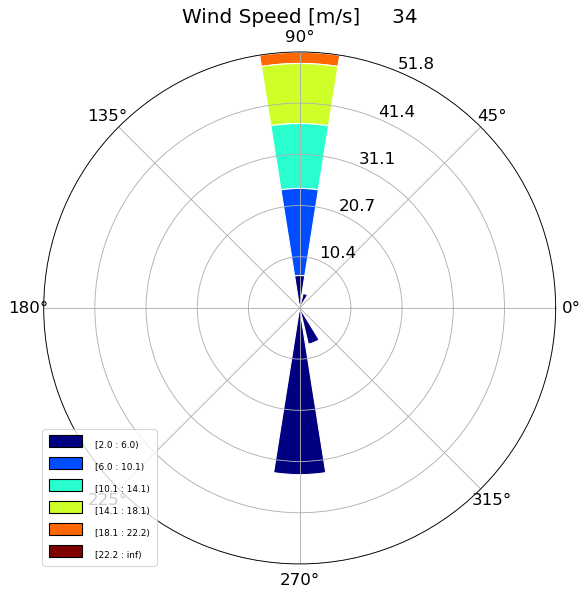

In [22]:
k = 34
ax1 = WindroseAxes.from_ax();
ax1.bar(df_phi[str(k)], df_wndspd[str(k)], normed=True, opening=0.8, edgecolor='white');
ax1.set_title('Wind Speed [m/s]     '+str(k));
ax1.set_legend();

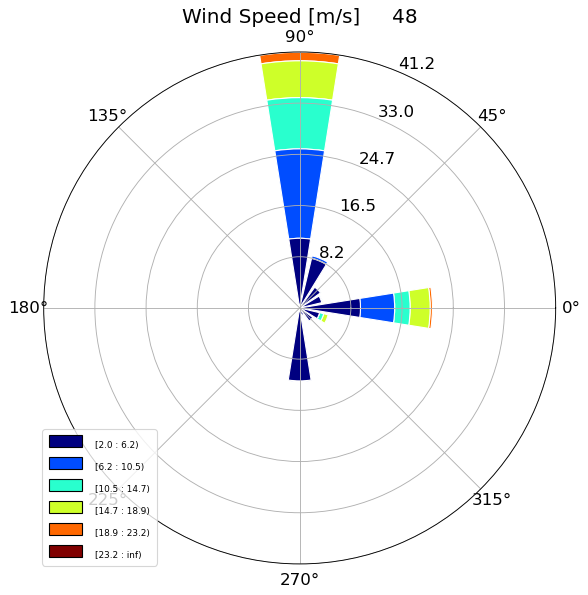

In [23]:
k = 48
ax1 = WindroseAxes.from_ax();
ax1.bar(df_phi[str(k)], df_wndspd[str(k)], normed=True, opening=0.8, edgecolor='white');
ax1.set_title('Wind Speed [m/s]     '+str(k));
ax1.set_legend();

## Correlation Matrix

In [24]:
k=11
df_red = df[df['wt']==k][['avg_metwndspd_ms','avg_wtgp_kw','avg_genspd_rpm','avg_metextmp_degc','avg_nacelle_degc',
    'max_nacelle_degc','avg_rotpitchanga_deg','avg_rotspd_rpm','avg_wtgcos_phi','avg_wtgq_kvar',
    'avg_rotpitchana_deg','avg_rotpitchanb_deg','avg_rotpitchanc_deg','avg_gen_l1_a',
    'avg_gen_l2_a','avg_gen_l2_v','avg_gen_l3_a','avg_gbx_hss_de_degc','avg_gbx_hss_nde_degc',
    'avg_gen_bear_de_degc','avg_gen_l1_degc','avg_gen_l2_degc','avg_mbearing_nde_degc']]


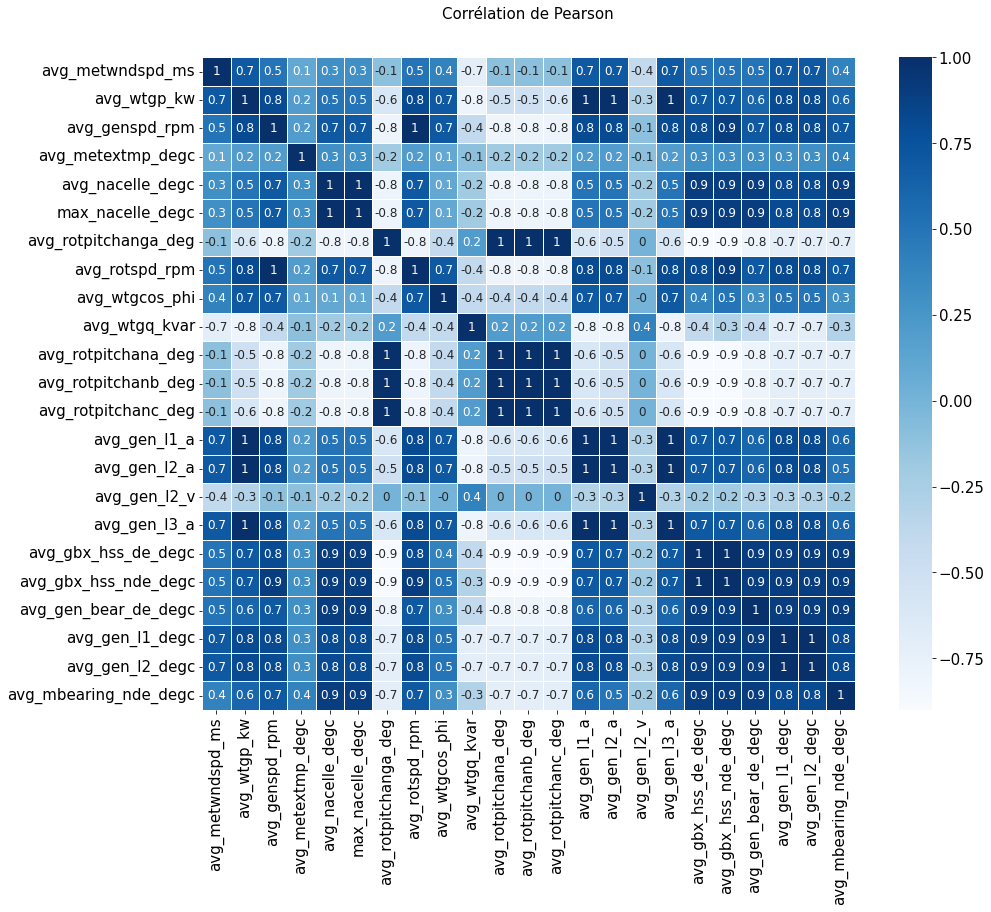

In [25]:

corr = df_red.corr(method="pearson")
corr = corr.round(1)
f,ax = plt.subplots(figsize=(16,12))
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr, cmap="Blues", square=True, ax=ax, annot=True, annot_kws={"size": 12}, linewidth=0.5)
plt.title('Corrélation de Pearson',y=1.05, size=15)

plt.show()

# Plot Hierarchical Clustering Dendrogram

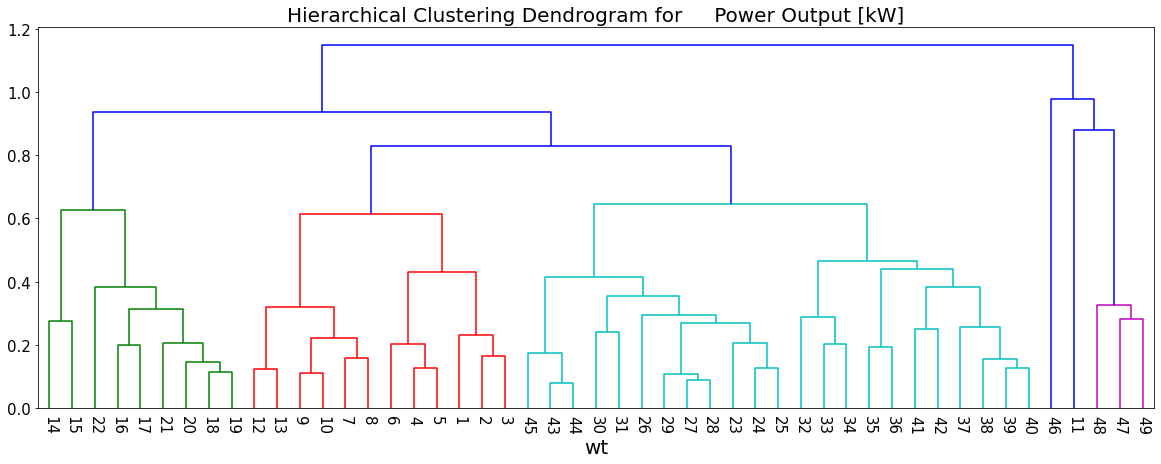

In [26]:
corr = df_wtgp.corr()

from scipy.cluster.hierarchy import dendrogram, linkage
import pylab

Z = linkage(corr, 'average')

plt.figure(figsize=(20, 7))
labelsize=20
ticksize=15
plt.title('Hierarchical Clustering Dendrogram for     Power Output [kW]', fontsize=labelsize)
plt.xlabel('wt', fontsize=labelsize)
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    labels = corr.columns
)
pylab.yticks(fontsize=ticksize)
pylab.xticks(rotation=-90, fontsize=ticksize)
plt.savefig('dendogram.png')
plt.show()


# AutoRegressive Integrated Moving Average (ARIMA)


Text(0.5, 1.0, 'Power Output [kW]     34')

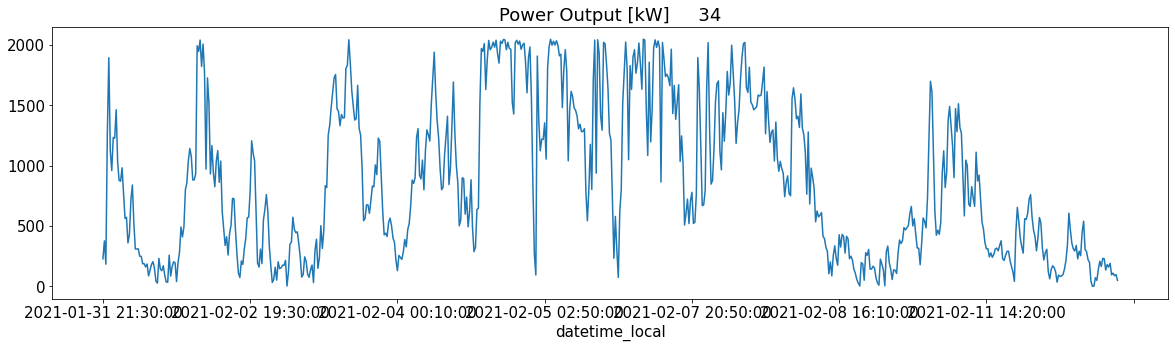

In [27]:
plt.figure(figsize=(20,5))

k = 34
df_clean = df_wtgp[str(k)].dropna()
df_clean.plot()
plt.title('Power Output [kW]     '+str(k))

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


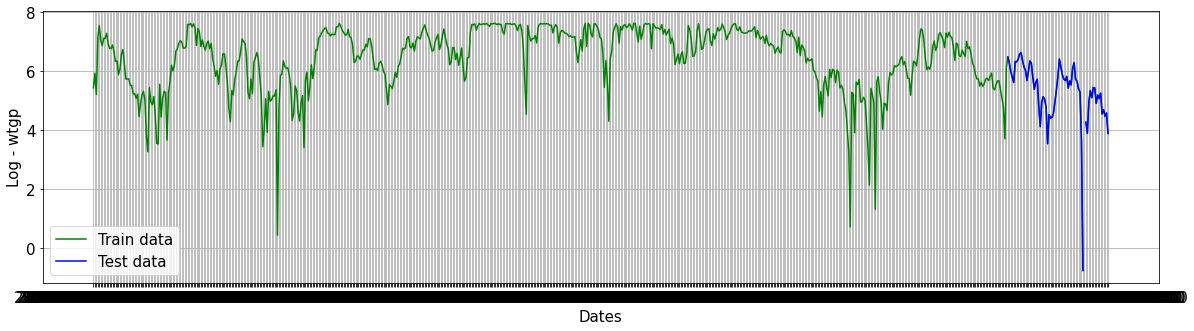

In [28]:
df_log = np.log(df_clean)

n_train = int(len(df_log)*0.9)
n_test = len(df_log) - int(len(df_log)*0.9)

#split data into train and training set
train_data, test_data = df_log[:n_train], df_log[n_train:]

plt.figure(figsize=(20,5))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Log - wtgp')
plt.plot(df_log, 'green', label='Train data');
plt.plot(test_data, 'blue', label='Test data');
plt.legend();



Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1201.485, Time=0.53 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1152.742, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1117.436, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1199.487, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1102.660, Time=0.36 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1104.618, Time=0.57 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1104.557, Time=0.45 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1103.020, Time=0.19 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1119.706, Time=0.13 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1105.092, Time=0.90 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1100.676, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1115.439, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1150.742, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1102.633, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0]          

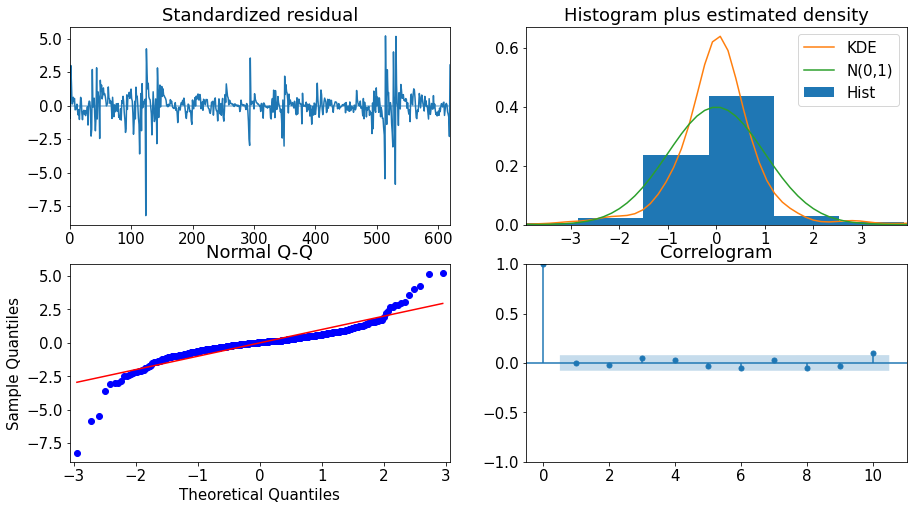

In [29]:
from pmdarima.arima import auto_arima
from pmdarima.arima import auto_arima

model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0,
                      start_Q=0,
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [30]:
from statsmodels.tsa.arima_model import ARIMA

# Modeling
# Build Model
model = ARIMA(train_data, order=(1,1,1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D.34   No. Observations:                  620
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -547.330
Method:                       css-mle   S.D. of innovations              0.585
Date:                Mon, 21 Feb 2022   AIC                           1102.660
Time:                        11:43:06   BIC                           1120.379
Sample:                             1   HQIC                          1109.548
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0011      0.009     -0.126      0.900      -0.019       0.017
ar.L1.D.34     0.3485      0.076      4.614      0.000       0.200       0.497
ma.L1.D.34    -0.7490      0.055    -13.645      0.0

/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [31]:
# Forecast
fc, se, conf = fitted.forecast(n_test, alpha=0.05)  # 95% conf


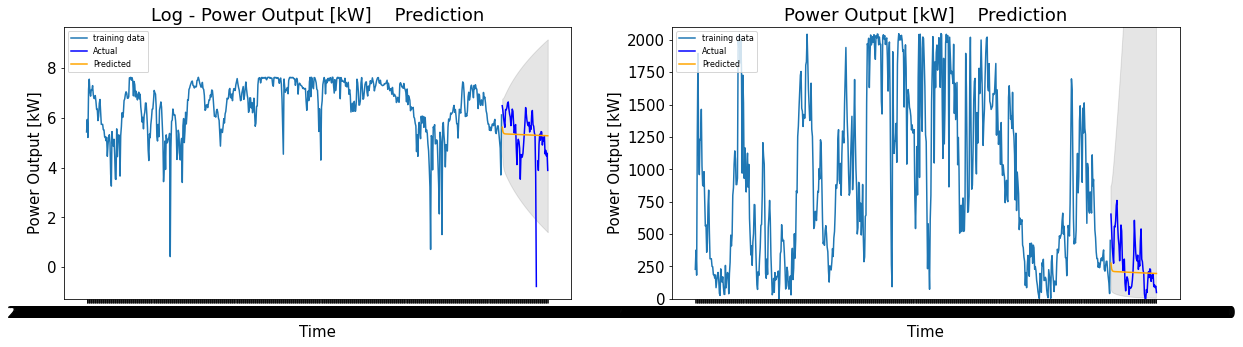

In [32]:
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

# Plot
ax1.plot(train_data, label='training data')
ax1.plot(test_data, color = 'blue', label='Actual')
ax1.plot(fc_series, color = 'orange',label='Predicted')
ax1.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)

ax1.set_title('Log - Power Output [kW]    Prediction')
ax1.set_xlabel('Time')
ax1.set_ylabel('Power Output [kW]')
ax1.legend(loc='upper left', fontsize=8)

# Plot
ax2.plot(np.exp(train_data), label='training data')
ax2.plot(np.exp(test_data), color = 'blue', label='Actual')
ax2.plot(np.exp(fc_series), color = 'orange',label='Predicted')
ax2.fill_between(lower_series.index, np.exp(lower_series), np.exp(upper_series), color='k', alpha=.10)

ax2.set_title('Power Output [kW]    Prediction')
ax2.set_ylim(0, 2100)
ax2.set_xlabel('Time')
ax2.set_ylabel('Power Output [kW]')
ax2.legend(loc='upper left', fontsize=8)
